In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [3]:
df = pd.read_csv('nuevo_dataset.csv')

C:\Users\Mauro\AppData\Local\Temp\ipykernel_9248\2663942252.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nuevo_dataset.csv')


In [5]:
# Visualizamos las primeras filas del DataFrame
df.head(3)

,id,directors_name,budget,id.1,original_language,overview,popularity,release_date,revenue,runtime,...,vote_count,cast,crew,release_year,return,collection_name,genres_list,production_companies_list,production_countries_list,spoken_languages_list
0,862,John Lasseter,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,...,5415.0,NaN,NaN,1995.0,12.451801,Toy Story Collection,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],['English']
1,8844,Joe Johnston,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,...,2413.0,NaN,NaN,1995.0,4.043035,NaN,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['English', 'Français']"
2,15602,Howard Deutch,0.0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,...,92.0,NaN,NaN,1995.0,0.000000,Grumpy Old Men Collection,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['United States of America'],['English']


In [6]:
# Obtenemos información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         45476 non-null  int64  
 1   directors_name             44589 non-null  object 
 2   budget                     45376 non-null  float64
 3   id.1                       45379 non-null  object 
 4   original_language          45368 non-null  object 
 5   overview                   44438 non-null  object 
 6   popularity                 45377 non-null  object 
 7   release_date               45376 non-null  object 
 8   revenue                    45379 non-null  float64
 9   runtime                    45130 non-null  float64
 10  status                     45296 non-null  object 
 11  tagline                    20398 non-null  object 
 12  title                      45376 non-null  object 
 13  vote_average               45376 non-null  flo

In [8]:
#Eliminamos las columnas vacías
df = df.drop(['crew', 'cast'], axis=1)

In [9]:
#Resumen estadístico del DataFrame
df.describe()

,id,budget,revenue,runtime,vote_average,vote_count,release_year,return
count,45476.000000,4.537600e+04,4.537900e+04,45130.000000,45376.000000,45376.000000,45376.000000,45379.0
mean,108345.997537,4.232604e+06,1.122936e+07,94.181675,5.624070,110.096439,1991.881193,inf
std,112443.796536,1.743986e+07,6.438789e+07,38.341059,1.915423,491.742894,24.055360,NaN
min,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.0
25%,26443.250000,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.0
50%,60002.500000,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.0
75%,157302.000000,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.0
max,469172.000000,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,inf


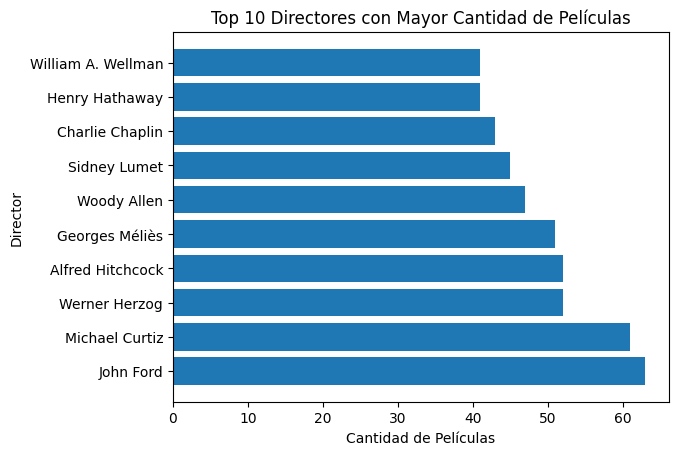

In [11]:
#VISUALIZAMOS LOS 10 DIRECTORES CON MAYOR CANTIDAD DE PELÍCULAS
top_10_directors = df['directors_name'].value_counts().nlargest(10)
plt.barh(top_10_directors.index, top_10_directors.values)
plt.xlabel('Cantidad de Películas')
plt.ylabel('Director')
plt.title('Top 10 Directores con Mayor Cantidad de Películas')
plt.show()

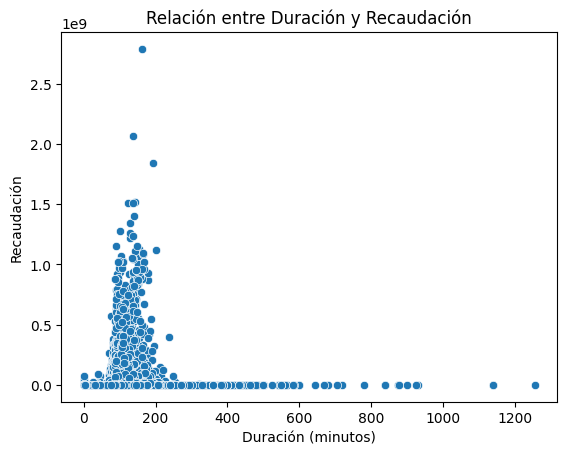

In [14]:
#VISUALIZAMOS LA RELACIÓN ENTRE LA DURACIÓN DE LAS PELÍCULAS Y SU RECAUDACIÓN
sns.scatterplot(x='runtime', y='revenue', data=df)
plt.xlabel('Duración (minutos)')
plt.ylabel('Recaudación')
plt.title('Relación entre Duración y Recaudación')
plt.show()

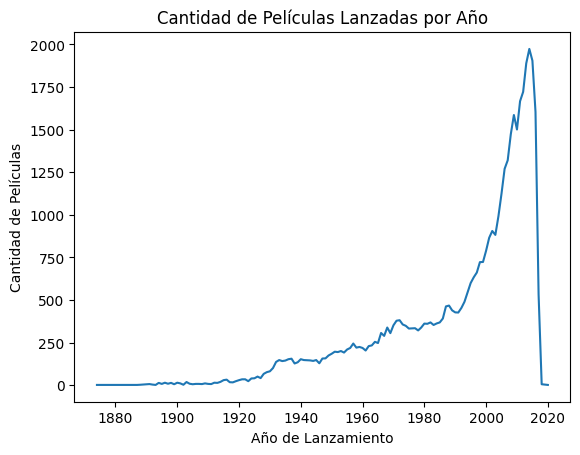

In [17]:
#VISUALIZAMOS LA CANTIDAD DE PELÍCULAS LANZADAS POR AÑO
movies_per_year = df['release_year'].value_counts().sort_index()
plt.plot(movies_per_year.index, movies_per_year.values)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Cantidad de Películas Lanzadas por Año')
plt.show()

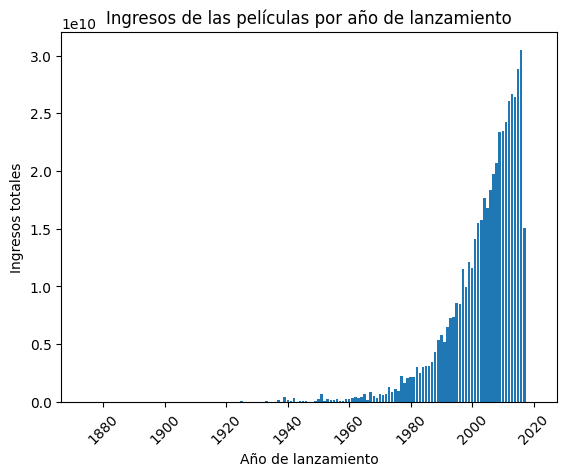

In [26]:
#VISUALIZAMOS EL INGRESO DE LAS PELÍCULAS POR AÑO DE LANZAMIENTO
ingresos_por_anio = df.groupby('release_year')['revenue'].sum()
plt.bar(ingresos_por_anio.index, ingresos_por_anio.values)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ingresos totales')
plt.title('Ingresos de las películas por año de lanzamiento')
plt.xticks(rotation=45)
plt.show()

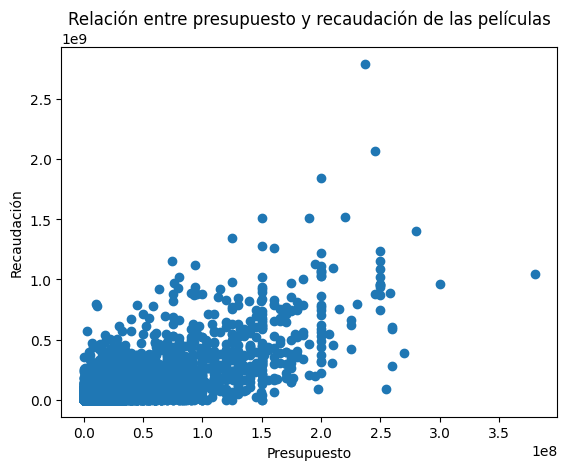

In [27]:
#VISUALIZAMOS LA RELACIÓN ENTRE EL PRESUPUESTO Y LA RECAUDACIÓN DE LAS PELÍCULAS
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación')
plt.title('Relación entre presupuesto y recaudación de las películas')
plt.show()

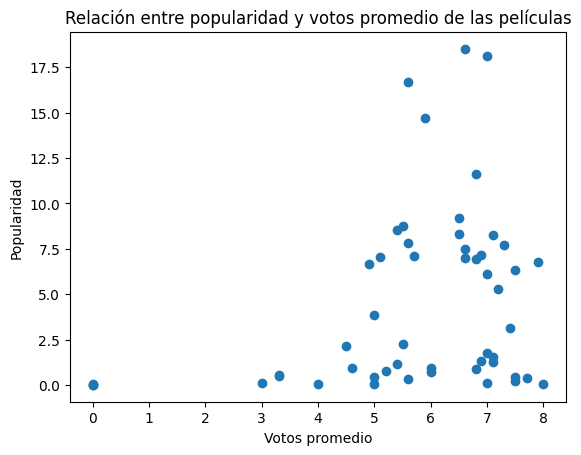

In [35]:
#VISUALIZAMOS LA RELACIÓN ENTRE POPULARIDAD Y VOTOS PROMEDIO DE LAS PELÍCULAS   

# Filtramos los datos para excluir valores no numéricos en la columna 'title'
df_filtered = df[df['title'].apply(lambda x: str(x).isnumeric())]

plt.scatter(df_filtered['vote_average'], df_filtered['popularity'])
plt.xlabel('Votos promedio')
plt.ylabel('Popularidad')
plt.title('Relación entre popularidad y votos promedio de las películas')

plt.show()

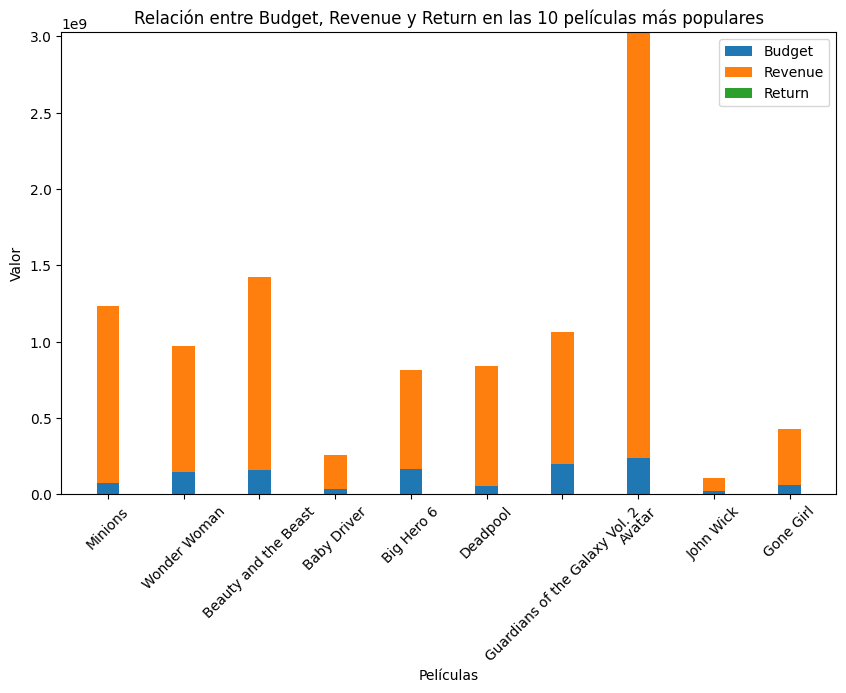

In [44]:
#VISUALIZAMOS LA RELACIÓN ENTRE 'BUDGET', 'REVENUE' Y 'RETURN EN LAS 10 PELÍCULAS MÁS POPULARES DEL DATASET.

# Filtramos el DataFrame para obtener las 10 películas más populares
top_10_popular_movies = df.nlargest(10, 'popularity')

# Obtenemos los valores de las columnas 'budget', 'revenue' y 'return' para las películas seleccionadas
budget_values = top_10_popular_movies['budget']
revenue_values = top_10_popular_movies['revenue']
return_values = top_10_popular_movies['return']

# Creamos la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Definimos los índices para las barras
indices = np.arange(10)

# Generamos el gráfico de barras apiladas
ax.bar(indices, budget_values, width=0.3, label='Budget')
ax.bar(indices, revenue_values, width=0.3, label='Revenue', bottom=budget_values)
ax.bar(indices, return_values, width=0.3, label='Return', bottom=budget_values+revenue_values)

# Configuramos los ejes y la leyenda
ax.set_xlabel('Películas')
ax.set_ylabel('Valor')
ax.set_title('Relación entre Budget, Revenue y Return en las 10 películas más populares')
ax.set_xticks(indices)
ax.set_xticklabels(top_10_popular_movies['title'], rotation=45)
ax.legend()

plt.show()

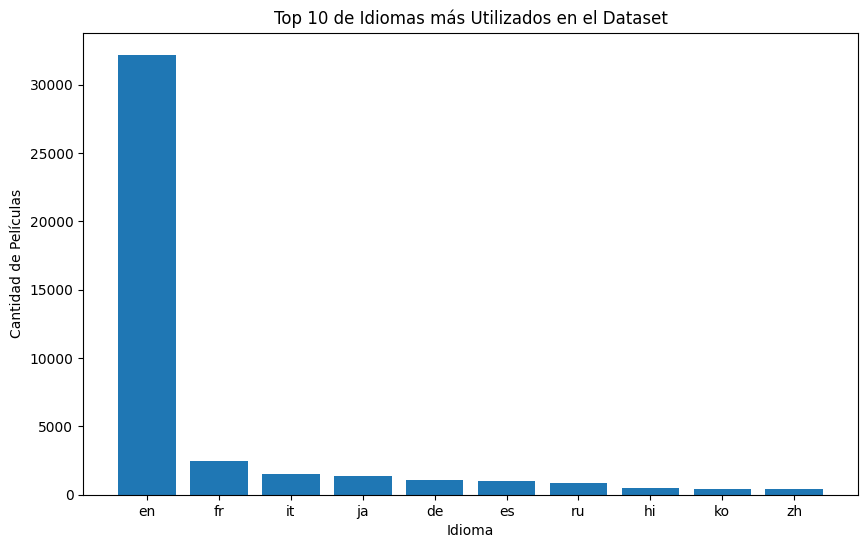

In [47]:
#VISUALIZAMOS EL TOP10 DE IDIOMAS MÁS UTILIZADOS EN EL DATASET

# Obtenemos los 10 idiomas más utilizados
top_10_languages = df['original_language'].value_counts().head(10)

# Creamos la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Generamos el gráfico de barras
ax.bar(top_10_languages.index, top_10_languages.values)

# Configuramos los ejes
ax.set_xlabel('Idioma')
ax.set_ylabel('Cantidad de Películas')
ax.set_title('Top 10 de Idiomas más Utilizados en el Dataset')

# Mostramos el gráfico
plt.show()

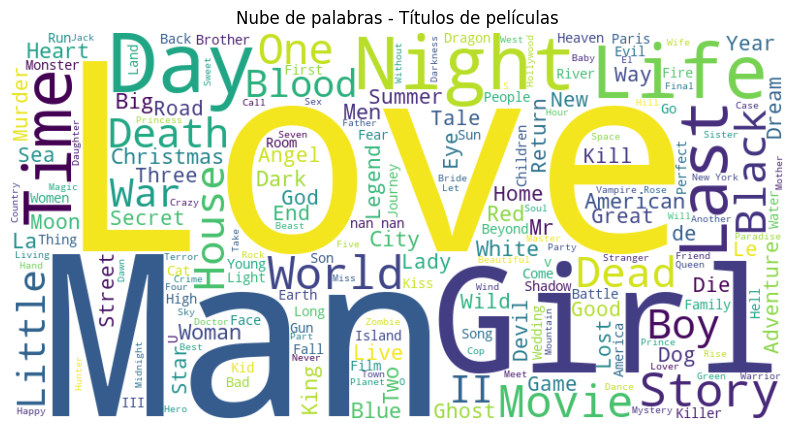

In [48]:
#NUBE DE PALABRAS BASADO EN EL TÍTULO DE LAS PELÍCULAS

# Concatenamos todos los títulos en una sola cadena de texto
all_titles = ' '.join(df['title'].astype(str))

# Creamos un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Visualizamos la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Títulos de películas')
plt.show()